In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [60]:
df=pd.read_csv("C://Users//Shani//Desktop//Logistic Regression Classification//Logistic Regression Project//loan.csv")

In [61]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


## Data Preprocessing 

df.describe()

df.shape

df.isnull().sum()

df.columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


## EDA

In [62]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['gender'] = df['gender'].astype(float)

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['education_level_encoded'] = label_encoder.fit_transform(df['education_level'])
df.drop(columns=['education_level'], inplace=True)

#print(df.head())

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['marital_status_encoded'] = label_encoder.fit_transform(df['marital_status'])
df.drop(columns=['marital_status'], inplace=True)
#print(df.head())

In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['occupation_encoded'] = label_encoder.fit_transform(df['occupation'])
df.drop(columns=['occupation'], inplace=True)
#print(df.head())

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])
df.drop(columns=['loan_status'], inplace=True)
#print(df.head())

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      61 non-null     int64  
 1   gender                   61 non-null     float64
 2   income                   61 non-null     int64  
 3   credit_score             61 non-null     int64  
 4   education_level_encoded  61 non-null     int32  
 5   marital_status_encoded   61 non-null     int32  
 6   occupation_encoded       61 non-null     int32  
 7   loan_status_encoded      61 non-null     int32  
dtypes: float64(1), int32(4), int64(3)
memory usage: 3.0 KB


## Finding Numerical and Categorical Variables

In [68]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['age', 'gender', 'income', 'credit_score', 'education_level_encoded', 'marital_status_encoded', 'occupation_encoded', 'loan_status_encoded']


In [69]:
df[numerical].head()

,age,gender,income,credit_score,education_level_encoded,marital_status_encoded,occupation_encoded,loan_status_encoded
0,32,0.0,85000,720,1,0,12,0
1,45,1.0,62000,680,4,1,35,0
2,28,0.0,25000,590,3,1,33,1
3,51,1.0,105000,780,1,0,16,0
4,36,0.0,75000,710,1,0,0,0


df[numerical].isnull().sum()

print(round(df[numerical].describe()),2)

## Visualization

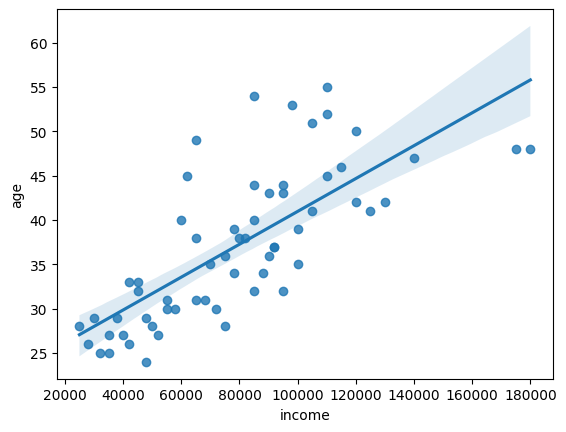

In [72]:
sns.regplot(x="income", y="age",data=df);

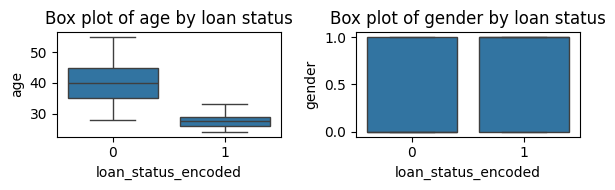

In [91]:
plt.figure(figsize=(6, 2))
for i, col in enumerate(num_cols, 1):
    if i <= 2:  # Limit the creation of subplots to 2
        plt.subplot(1, 2, i)
        sns.boxplot(x='loan_status_encoded', y=col, data=df)
        plt.title(f"Box plot of {col} by loan status")
plt.tight_layout()
plt.show()


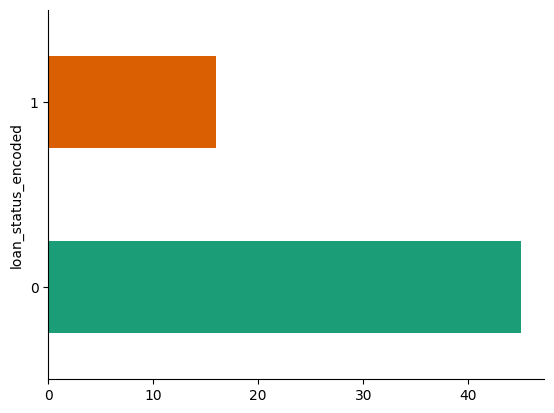

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('loan_status_encoded').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Income vs Credit Score')

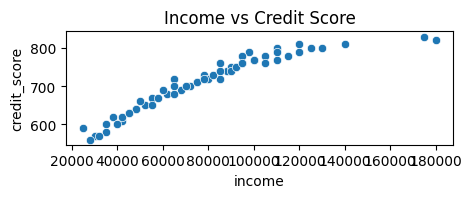

In [92]:
plt.figure(figsize=(5, 5))
plt.subplot(3, 1, 1)

sns.scatterplot(x='income', y='credit_score',data=df)
plt.title('Income vs Credit Score')

## Prepare the data


In [79]:
X = df.drop(columns=['loan_status_encoded'])
y = df['loan_status_encoded']

## Split the data into training and testing sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'gender',
 'income',
 'credit_score',
 'education_level_encoded',
 'marital_status_encoded',
 'occupation_encoded']

In [83]:
#X_train[numerical].isnull().sum()

In [84]:
#X_test[numerical].isnull().sum()

## Build Model

In [85]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Make predictions

In [86]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

## Evaluate the model

In [87]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9231


In [88]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9231


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13

